# Proyek Analisis Data: Air Quality
- Nama: Taufik Syah Mauludin
- Email: taufiksyah24@gmail.com
- Id Dicoding: taufiksyahm

## Menentukan Pertanyaan Bisnis

- Bagaimana konsentrasi PM2.5 di Aotizhongxin dari tahun 2013 hingga tahun 2017?
- Bagaimana kondisi temperatur di Aotizhongxin dari tahun 2013 hingga 2017?

## Menyaipkan semua library yang dibuthkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [48]:
# Membaca data
df_aoti = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [14]:
# Memuat tabel Aotizhongxin
df_aoti.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [15]:
# Memeriksa tipe data
df_aoti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Berdasarkan info tersebut, terdapat perbedaan jumlah data pada beberapa kolom.

In [16]:
# Memeriksa missing values
df_aoti.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [17]:
# Daftar kolom dengan missing value
df_aoti.columns[df_aoti.isnull().any()].tolist()

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

Terdapat missing value, terutama pada kolom yang akan dianalisis, yaitu "PM2.5" dan "TEMP"

In [18]:
# Memeriksa duplikasi data
df_aoti.duplicated().sum()

0

Tidak ada data yang terduplikat

In [19]:
# Memeriksa parameter statistik
df_aoti.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Tidak terdapat inaccurate value

In [20]:
# Fungsi untuk mengecek outlier
def outliers(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < minimum or x > maximum]
    return(outliers)

In [42]:
# Outlier pada PM2.5
print(outliers(df_aoti["PM2.5"]))

[284.0, 272.0, 254.0, 266.0, 254.0, 260.0, 275.0, 306.0, 320.0, 292.0, 255.0, 258.0, 277.0, 282.0, 267.0, 282.0, 363.0, 376.0, 344.0, 339.0, 339.0, 324.0, 322.0, 315.0, 310.0, 309.0, 310.0, 326.0, 326.0, 330.0, 256.0, 287.0, 278.0, 269.0, 286.0, 304.0, 312.0, 316.0, 353.0, 355.0, 328.0, 308.0, 304.0, 314.0, 276.0, 276.0, 275.0, 278.0, 272.0, 264.0, 270.0, 257.0, 267.0, 293.0, 322.0, 294.0, 332.0, 352.0, 362.0, 356.0, 344.0, 357.0, 364.0, 392.0, 423.0, 434.0, 450.0, 463.0, 308.0, 257.0, 260.0, 263.0, 254.0, 366.0, 262.0, 272.0, 279.0, 288.0, 288.0, 273.0, 316.0, 311.0, 303.0, 304.0, 294.0, 288.0, 308.0, 276.0, 269.0, 278.0, 278.0, 665.0, 665.0, 348.5, 320.0, 392.0, 368.0, 317.0, 287.0, 279.0, 263.0, 263.0, 254.0, 277.0, 267.0, 344.0, 464.0, 494.0, 485.0, 510.0, 494.0, 430.0, 279.0, 262.0, 281.0, 306.0, 254.0, 254.0, 269.0, 277.0, 271.0, 260.0, 260.0, 253.0, 278.0, 263.0, 263.0, 265.0, 276.0, 283.0, 290.0, 262.0, 253.0, 284.0, 281.0, 283.0, 290.0, 297.0, 321.0, 290.0, 282.0, 295.0, 280.0

Terdapat outlier pada kolom "PM2.5". Namun outlier tersebut bukan data yang janggal, sehingga tidak akan dilakukan pembersihan pada data outlier.

In [43]:
# Outlier pada TEMP
print(outliers(df_aoti["TEMP"]))

[]


Tidak terdapat data outlier pada kolom "TEMP"

Pada data-data diatas tidak ada invalid value maupun inconsistent value

### Cleaning Data

Kolom yang tidak diperlukan pada analisis ini akan di hapus.

In [49]:
df_aoti.columns.tolist()

['No',
 'year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM',
 'station']

In [50]:
df_aoti.drop(['No',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM',
 'station'],axis=1, inplace=True)

In [51]:
# Daftar kolom terbaru
df_aoti.columns.tolist()

['year', 'month', 'day', 'hour', 'PM2.5', 'TEMP']

Teknik untuk mengatasi missing value pada data diatas adalah interpolation. Teknik interpolation dipilih karena data tersebut merupakan data time series. Jika menggunakan teknik dropping, maka akan kehilangan data karena data telah disusun berdasarkan waktu. Jika menggunakan teknik imputation, maka akan mempengaruhi variance dari data.

In [52]:
df_aoti["PM2.5"].interpolate(method='linear', limit_direction='forward', inplace=True)
df_aoti["TEMP"].interpolate(method='linear', limit_direction='forward', inplace=True)

In [53]:
# konversi kolom "year", "month", "day", "hour" menjadi format time
df_aoti['timestamp'] = pd.to_datetime(df_aoti[['year', 'month', 'day', 'hour']])

In [54]:
df_aoti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   year       35064 non-null  int64         
 1   month      35064 non-null  int64         
 2   day        35064 non-null  int64         
 3   hour       35064 non-null  int64         
 4   PM2.5      35064 non-null  float64       
 5   TEMP       35064 non-null  float64       
 6   timestamp  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 1.9 MB


Data sudah tidak ada missing value

## Exploratory Data Analysis (EDA)

In [55]:
# Memeriksa parameter statistik
df_aoti.describe()

,year,month,day,hour,PM2.5,TEMP
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,82.540623,13.581414
std,1.177213,3.448752,8.800218,6.922285,81.956401,11.400426
min,2013.000000,1.000000,1.000000,0.000000,3.000000,-16.800000
25%,2014.000000,4.000000,8.000000,5.750000,22.000000,3.100000
50%,2015.000000,7.000000,16.000000,11.500000,58.000000,14.500000
75%,2016.000000,10.000000,23.000000,17.250000,114.000000,23.300000
max,2017.000000,12.000000,31.000000,23.000000,898.000000,40.500000


Konsentrasi PM2.5 di kota Aotizhongxin berkisar antara 3 hingga 898 μg/m<sup>3</sup>. Temperatur di kota Aotizhongxin berkisar pada -16.8 hingga 40.5<sup>o</sup>C.

Seperti yang dijelaskan pada assessing data, terdapat data outlier pada kolom "PM2.5". Sehingga, untuk mencari nilai sentral pada data tersebut akan menggunakan nilai median.

In [56]:
df_aoti.groupby([df_aoti['timestamp'].dt.year,df_aoti['timestamp'].dt.month]).agg({
    "PM2.5":"median",
    "TEMP": "mean"
})

PM2.5       TEMP
timestamp timestamp                       
2013      3           90.000000   6.053629
          4           50.000000  12.260694
          5           69.000000  21.374194
          6           91.000000  23.386111
          7           55.000000  26.877419
          8           47.500000  26.744355
          9           65.000000  20.077778
          10          61.000000  12.809812
          11          47.000000   5.530972
          12          40.000000  -0.161290
2014      1           73.000000  -0.138306
          2          119.000000  -0.097321
          3           73.000000   9.920430
          4          101.000000  16.891528
          5           62.000000  21.176075
          6           49.000000  24.585972
          7           77.500000  27.806317
          8           58.000000  25.817070
          9           64.000000  20.767222
          10          93.000000  13.572715
          11          54.000000   5.940972
          12          31.443314  -0.648790
2015      1           75.000000  -0.709409
          2           56.000000   1.231845
          3           69.000000   8.439862
          4           66.000000  15.630139
          5           46.000000  21.455511
          6           40.500000  24.537778
          7           59.500000  26.397849
          8           33.000000  26.435753
          9           30.000000  20.600833
          10          36.000000  14.319758
          11          91.000000   2.847778
          12         110.500000  -0.362769
2016      1           29.000000  -4.550000
          2           18.000000   1.398420
          3           65.000000   9.201882
          4           62.000000  16.454722
          5           42.000000  21.672849
          6           50.000000  25.735833
          7           65.000000  27.699462
          8           38.000000  27.863306
          9           33.000000  22.219115
          10          60.000000  13.338648
          11          82.000000   4.414028
          12         107.000000   0.640726
2017      1           66.000000  -1.138740
          2           30.000000   2.661533

In [57]:
# Nilai minimum data tiap bulan
df_aoti.groupby([df_aoti['timestamp'].dt.year,df_aoti['timestamp'].dt.month]).agg({
    "PM2.5":"median",
    "TEMP": "mean"
}).min()

PM2.5    18.00
TEMP     -4.55
dtype: float64

In [58]:
# Nilai maksimum data tiap bulan
df_aoti.groupby([df_aoti['timestamp'].dt.year,df_aoti['timestamp'].dt.month]).agg({
    "PM2.5":"median",
    "TEMP": "mean"
}).max()

PM2.5    119.000000
TEMP      27.863306
dtype: float64

Untuk rata-rata konsentrasi PM2.5 setiap bulan di kota Aotizhongxin dari Maret 2013 sampai Februari 2017 berkisar antara 18 hingga 119 μg/m<sup>3</sup>. Sedangkan untuk temperatur berkisar antara -4.55 hingga 27.86 <sup>o</sup>C.

## Visualization & Explanatory Analysis

### Pertanyaan 1: 
- Bagaimana konsentrasi PM2.5 di Aotizhongxin dari tahun 2013 hingga tahun 2017?

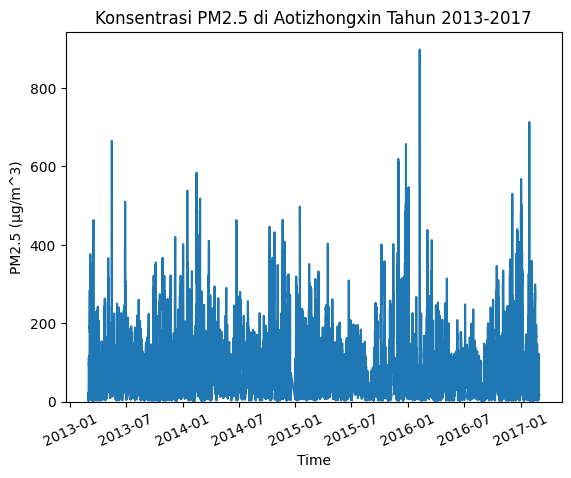

In [59]:
# Grafik data konsentrasi PM2.5 dari tahun 2013-2017
plt.figure()
sns.lineplot(x = "timestamp", y = "PM2.5", data = df_aoti)
plt.xlabel("Time")
plt.ylabel("PM2.5 (μg/m^3)")
plt.ylim(0)
plt.title("Konsentrasi PM2.5 di Aotizhongxin Tahun 2013-2017")
plt.xticks(rotation = 25)
plt.show()


Konsentrasi PM2.5 di Aotizhongxin pada tahun 2013 hingga 2017 berkisar pada +- 300 μg/m<sup>3</sup>. Konsentrasi yang meningkat hanya terjadi sesekali.

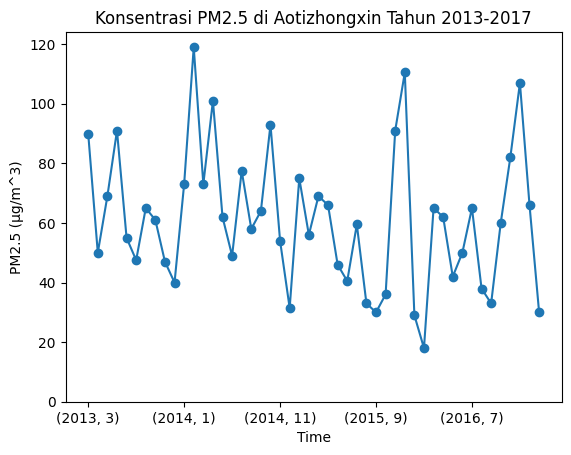

In [60]:
# Grafik konsentrasi PM2.5 per bulan dari tahun 2013 hingga 2017
df_aoti["PM2.5"].groupby([df_aoti['timestamp'].dt.year,df_aoti['timestamp'].dt.month]).median().plot(marker="o")
plt.xlabel("Time")
plt.ylabel("PM2.5 (μg/m^3)")
plt.ylim(0)
plt.title("Konsentrasi PM2.5 di Aotizhongxin Tahun 2013-2017")
plt.show()

Puncak konsentrasi PM2.5 terjadi pada setiap awal/akhir tahun.

### Pertanyaan 2: 
- Bagaimana kondisi temperatur di Aotizhongxin dari tahun 2013 hingga 2017?

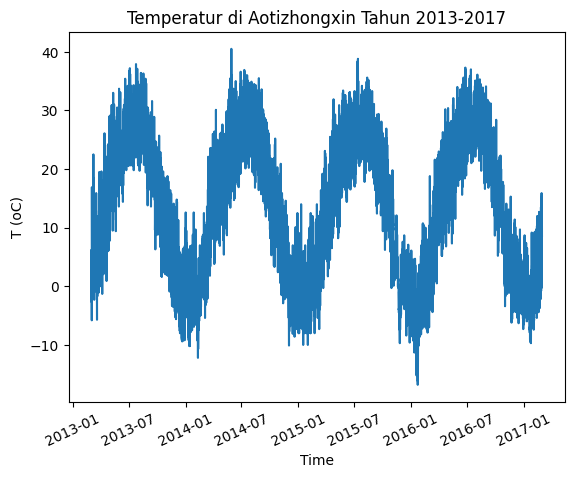

In [61]:
# Grafik temperatur dari tahun 2013 hingga 2017
plt.figure()
sns.lineplot(x = "timestamp", y = "TEMP", data = df_aoti)
plt.xlabel("Time")
plt.ylabel("T (oC)")
plt.title("Temperatur di Aotizhongxin Tahun 2013-2017")
plt.xticks(rotation = 25)
plt.show()

Temperatur di Aotizhongxin pada tahun 2013 hingga 2017 mengalami fluktuatif secara periodik.

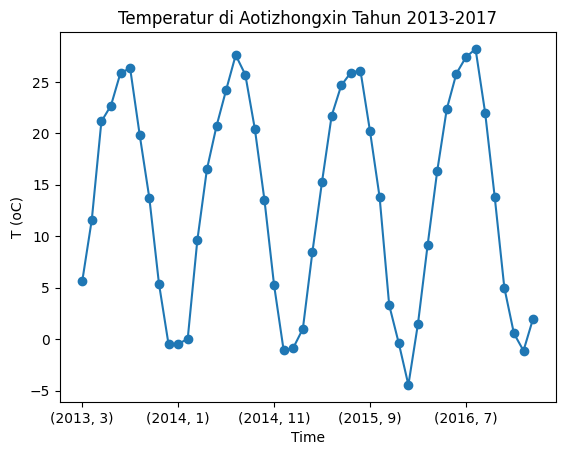

In [62]:
# Grafik temperatur per bulan dari tahun 2013 hingga 2017
df_aoti["TEMP"].groupby([df_aoti['timestamp'].dt.year,df_aoti['timestamp'].dt.month]).median().plot(marker='o')
plt.xlabel("Time")
plt.ylabel("T (oC)")
plt.title("Temperatur di Aotizhongxin Tahun 2013-2017")
plt.show()

Temperatur tinggi terjadi pada pertengahan tahun dan temperatur rendah terjadi pada awal/akhir tahun.

## Teknik Analisis Lanjutan

Teknik yang digunakan adalah clustering, yaitu mengelompok data datetime berdasarkan musim, tahun, bulan, dan jam.

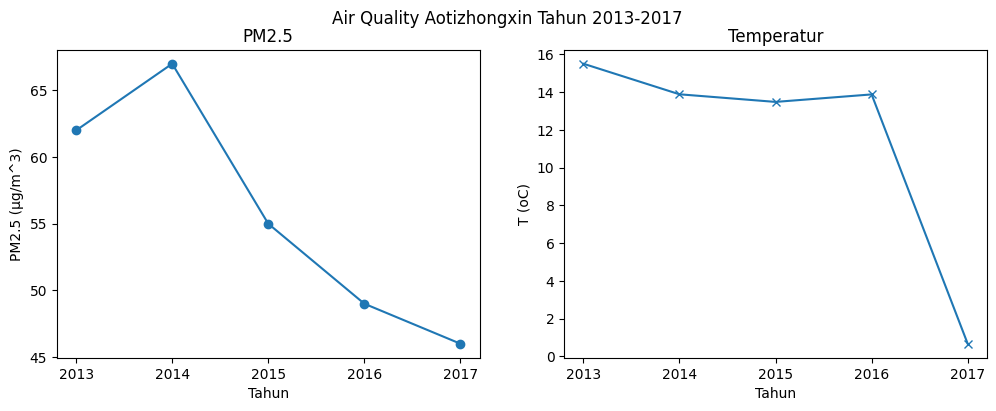

In [63]:
# Grafik air quality per tahun
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Air Quality Aotizhongxin Tahun 2013-2017')
df_aoti["PM2.5"].groupby(df_aoti['timestamp'].dt.year).median().plot(marker="o", ax=ax1)
df_aoti["TEMP"].groupby(df_aoti['timestamp'].dt.year).mean().plot(marker="x", ax=ax2)
ax1.set_title('PM2.5')
ax2.set_title('Temperatur')
ax1.set_xlabel('Tahun')
ax2.set_xlabel('Tahun')
ax1.set_ylabel('PM2.5 (μg/m^3)')
ax2.set_ylabel('T (oC)')
ax1.set_xticks(np.arange(2013, 2018, 1))
ax1.set_xticklabels(np.arange(2013, 2018, 1))
ax2.set_xticks(np.arange(2013, 2018, 1))
ax2.set_xticklabels(np.arange(2013, 2018, 1))
plt.show()

Pada tahun 2017 memiliki nilai yang sangat berbeda dibandingkan dengan tahun sebelumnya karena data pada tahun 2017 hanya tersedia hingga bulan Februari. Rerata konsentrasi PM2.5 tertinggi terjadi pada tahun 2014 dan rerata temperatur tertinggi terjadi pada tahun 2013. 

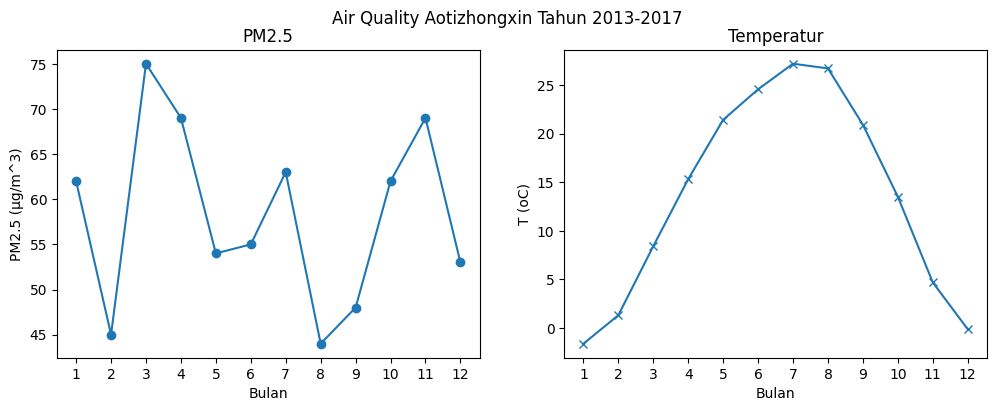

In [64]:
# Grafik air quality per bulan
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Air Quality Aotizhongxin Tahun 2013-2017')
df_aoti["PM2.5"].groupby(df_aoti['timestamp'].dt.month).median().plot(marker="o", ax=ax1)
df_aoti["TEMP"].groupby(df_aoti['timestamp'].dt.month).mean().plot(marker="x", ax=ax2)
ax1.set_title('PM2.5')
ax2.set_title('Temperatur')
ax1.set_xlabel('Bulan')
ax2.set_xlabel('Bulan')
ax1.set_ylabel('PM2.5 (μg/m^3)')
ax2.set_ylabel('T (oC)')
ax1.set_xticks(np.arange(1, 13, 1))
ax1.set_xticklabels(np.arange(1, 13, 1))
ax2.set_xticks(np.arange(1, 13, 1))
ax2.set_xticklabels(np.arange(1, 13, 1))
plt.show()

Rerata konsentrasi PM2.5 tertinggi terjadi pada bulan maret dan rerata temperatur tertinggi terjadi pada bulan agustus.

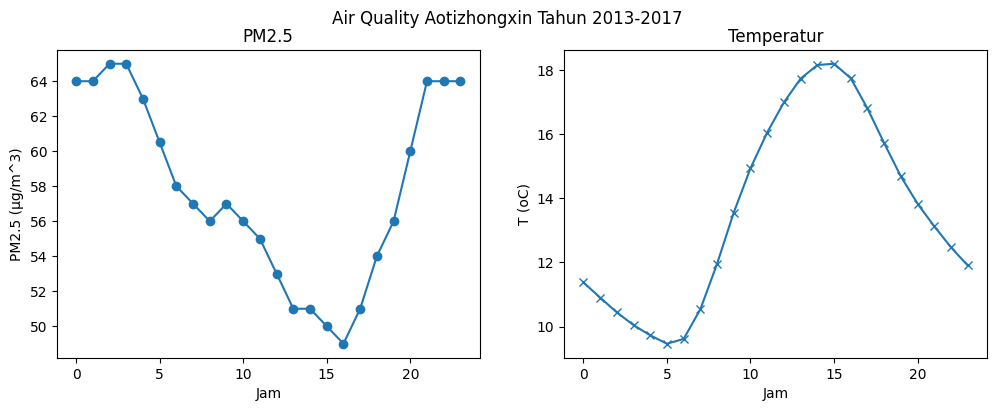

In [65]:
# Grafik air quality per jam
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Air Quality Aotizhongxin Tahun 2013-2017')
df_aoti["PM2.5"].groupby(df_aoti['timestamp'].dt.hour).median().plot(marker="o", ax=ax1)
df_aoti["TEMP"].groupby(df_aoti['timestamp'].dt.hour).mean().plot(marker="x", ax=ax2)
ax1.set_title('PM2.5')
ax2.set_title('Temperatur')
ax1.set_xlabel('Jam')
ax2.set_xlabel('Jam')
ax1.set_ylabel('PM2.5 (μg/m^3)')
ax2.set_ylabel('T (oC)')
plt.show()

Rerata konsentrasi PM2.5 yang tinggi terjadi pada sekitar jam 22-3 dan rerata temperatur tinggi terjadi pada sekitar jam 13-16. Sebaliknya, rerata konsentrasi PM2.5 yang rendah terjadi pada sekitar jam 13-17 dan rerata temperatur rendah terjadi pada sekitar jam 2-7. Berdasarkan hal tersebut, bisa dikatakan konsentrasi PM2.5 berkorelasi secara negatif dengan temperatur. Hal ini disebabkan oleh penurunan suhu di malam hari menurunkan difusi partikel sehingga meningkatkan konsentrasi PM2,5 yang sesuai dengan penelitian yang telah dilakukan sebelumnya (Hernandez dkk, 2017).

In [66]:
df_aoti['Musim'] = df_aoti['timestamp'].dt.month.map({1: 'Dingin',
                                                      2: 'Dingin',
                                                      3: 'Semi',
                                                      4: 'Semi',
                                                      5: 'Semi',
                                                      6: 'Panas',
                                                      7: 'Panas',
                                                      8: 'Panas',
                                                      9: 'Gugur',
                                                      10: 'Gugur',
                                                      11: 'Gugur',
                                                      12: 'Dingin'})


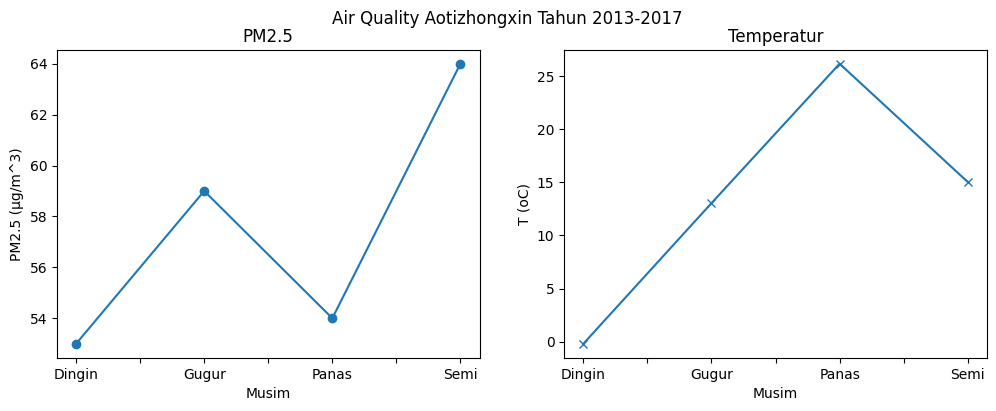

In [67]:
# Grafik air quality per musim
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Air Quality Aotizhongxin Tahun 2013-2017')
df_aoti.groupby('Musim')['PM2.5'].median().plot(marker="o", ax=ax1)
df_aoti.groupby('Musim')['TEMP'].mean().plot(marker="x", ax=ax2)
ax1.set_title('PM2.5')
ax2.set_title('Temperatur')
ax1.set_xlabel('Musim')
ax2.set_xlabel('Musim')
ax1.set_ylabel('PM2.5 (μg/m^3)')
ax2.set_ylabel('T (oC)')
plt.show()

Konsentrasi PM2.5 tertinggi terjadi pada musim gugur dan temperatur tertinggi terjadi pada musim panas.

## Conclusion

- Bagaimana konsentrasi PM2.5 di Aotizhongxin dari tahun 2013 hingga tahun 2017?


Konsentrasi PM2.5 akan meningkat ketika awal/akhir tahun terutama saat memasuki musim semi. Selain itu, konsentrasi PM2.5 meningkat pada saat malam hari. Puncak konsentrasi PM2.5 tertinggi terjadi pada bulan februari tahun 2014. Konsentrasi PM 2.5 yang rendah terjadi ketika musim dingin dan ketika menjelang sore hari.

- Bagaimana kondisi temperatur di Aotizhongxin dari tahun 2013 hingga 2017?


Naik-turunnya temperatur bergerak secara periodik. Temperatur akan meningkat ketika pertengahan tahun saat memasuki musim panas. Selain itu, temperatur meningkat ketika siang hingga sore hari. Temperatur tertinggi terjadi pada bulan agustus tahun 2016. Temperatur yang rendah terjadi ketika musim dingin atau ketika malam/pagi hari.

### Dashboard

https://dashboard-air-quality-aotizhongxin.streamlit.app/
